In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd

In [112]:
# Load the data

# https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi
file = "./data/df_arabica_clean.csv"
df = pd.read_csv(file)

In [113]:
# Remove rows where altitude is missing
df.dropna(subset=["Altitude"], inplace=True)

# Describe it
#display(df.info())
display(df.describe())
#display(df.head())

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.0,206.0,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.000000
mean,102.990291,102.990291,156.199029,7.720534,7.744709,7.600243,7.690825,7.640777,7.643932,9.990291,10.0,10.0,7.676845,0.0,83.706748,10.727184,0.131068,0.694175,2.218447
std,60.045673,60.045673,244.841779,0.288226,0.280294,0.276495,0.260028,0.234059,0.256917,0.103556,0.0,0.0,0.307105,0.0,1.734631,1.245064,0.590416,1.690336,2.919380
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.830000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.250000,51.250000,1.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,102.500000,102.500000,15.000000,7.670000,7.750000,7.580000,7.710000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.790000,10.800000,0.000000,0.000000,1.000000
75%,154.750000,154.750000,275.000000,7.920000,7.920000,7.750000,7.897500,7.750000,7.810000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.580000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [114]:
# Basic wrangling - convert the altitude column from strings to numbers. Where a range is given, take the average
altitude = df.Altitude.to_list()
avg_altitude = []

#display(altitude)
for k in range(len(altitude)):
    alt_str = altitude[k].replace("~", "-").replace("A", "-")

    if "-" in alt_str:
        split_alt = alt_str.split("-")
        alt = 0.5*(float(split_alt[0]) + float(split_alt[1]))
    else:
        alt = float(alt_str)

    #print("altitude[%d] = %s --> %.2f" % (k, alt_str, alt))
    avg_altitude.append(alt)

df["Average Altitude"] = pd.Series(avg_altitude)
#display(df.describe())

In [115]:
# Remove values we don't want, then sort by altitude
df = df.loc[(df["Moisture Percentage"] > 0) & (df["Average Altitude"] < 2000)]
df = df.sort_values("Average Altitude")

Text(0, 0.5, 'Moisture Percentage')

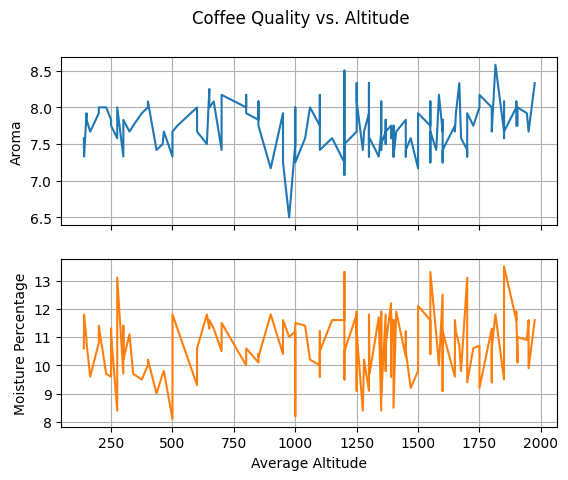

In [135]:
# Plot various numerical scores vs. altitude
columns = ["Aroma", "Moisture Percentage"]
ax = df.plot(kind="line", x="Average Altitude", y=columns, legend=False, grid=True, subplots=True, title="Coffee Quality vs. Altitude")
ax[0].set_ylabel(columns[0])
ax[1].set_ylabel(columns[1])